In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
#from sklearn.linear_model import SGDClassifier

In [ ]:
data = pd.read_table('wifi_localization.txt',
                     header = None,
                     names=["WS1", "WS2", "WS3", "WS4", "WS5", "WS6", "WS7", "Class"])
data.head()

,WS1,WS2,WS3,WS4,WS5,WS6,WS7,Class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [ ]:
data = data.to_numpy()
X = data[:,0:-1]
y = np.asarray([(x - 1) for x in data[:,-1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 7)
(600, 7)
(1400,)
(600,)


In [ ]:
loss_values = []
f1s = []
n_neurons = 1
inds = []
for i in range(1, 64):
  for j in range(1, 64):
    mlpc = MLPClassifier(activation='relu',
                         solver='adam',
                         hidden_layer_sizes=(i,j),
                         max_iter=1000,
                         random_state=1,
                         learning_rate='adaptive',
                         early_stopping=True)
    mlpc.fit(X_train, y_train)
    pred_mlpc = mlpc.predict(X_test)
    f1s.append(f1_score(y_test, pred_mlpc, zero_division=1, average='weighted'))
    loss_values.append(mlpc.loss_curve_)
    inds.append([i,j])
    n_neurons = n_neurons + 1

0.9832826558748596
[32, 40]


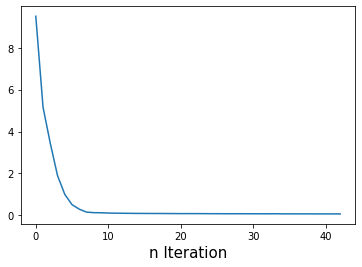

In [ ]:
# plt.figure(figsize=(20, 15), dpi=80)
# count = 0
# for i in range(7):
#     for j in range(9):
#         ax = plt.subplot2grid((7,9), (i,j))
#         ax.plot(loss_values[count])
#         ax.set_title(f"{count+1} - {str(round(f1s[count], 2))}")
#         count = count + 1

print(max(f1s))
print(inds[f1s.index(max(f1s))])
plt.plot(loss_values[f1s.index(max(f1s))])
plt.xlabel('n Iteration', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlpc, X_test, y_test, cv=3)

array([0.88 , 0.875, 0.775])

In [ ]:
mlpc2 = MLPClassifier(activation='relu',
                         solver='adam',
                         hidden_layer_sizes=(32, 40),
                         max_iter=1000,
                         random_state=1,
                         learning_rate='adaptive',
                         early_stopping=True)
mlpc2.fit(X_train, y_train)



MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 40),
              learning_rate='adaptive', max_iter=1000, random_state=1)

In [ ]:
from sklearn.metrics import precision_score, recall_score
from numpy import array, rec
pred_mlpc2 = mlpc2.predict(X_test)
print(classification_report(y_test, pred_mlpc2))
print(accuracy_score(y_test, pred_mlpc2))

# ag = y_test.argsort()
# xx, yy = X_test[ag], y_test[ag]
# xx0, yy0 = xx[0:150], yy[0:150]
# xx1, yy1 = xx[150:299], yy[150:299]
# xx2, yy2 = xx[299:447], yy[299:447]
# xx3, yy3 = xx[447:], yy[447:]

# print(yy0, yy1, yy2, yy3)
# print(yy0.shape, yy1.shape, yy2.shape, yy3.shape)
# print(yy.shape)



              precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           1       0.98      0.88      0.93       146
           2       0.88      0.91      0.90       161
           3       0.94      1.00      0.97       149

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

0.9416666666666667


In [ ]:
pred_mlpc2 = mlpc2.predict(X_test)
# print(f1_score(yy3, pred_mlpc2, zero_division=1, average='weighted'))
# print(accuracy_score(yy3, pred_mlpc2))
# print(precision_score(yy3, pred_mlpc2, zero_division=1, average='weighted'))
# print(recall_score(yy3, pred_mlpc2, zero_division=1, average='weighted'))
print(f1_score(y_test, pred_mlpc2, zero_division=1, average='weighted'))

0.9415451753160117


In [ ]:
from sklearn.utils.multiclass import unique_labels
#Confusion Matrix
def plot2(y_true, y_pred):
  labels = unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true,y_pred),
                       columns=column, index=indices)

  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

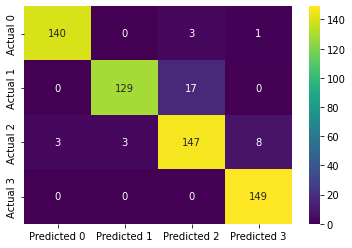

In [ ]:
plot2(y_test, pred_mlpc2)

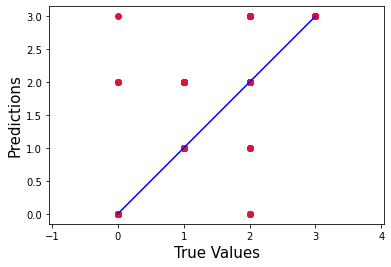

In [ ]:
plt.scatter(y_test, pred_mlpc2, c='crimson')

p1 = max(max(pred_mlpc2), max(y_test))
p2 = min(min(pred_mlpc2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

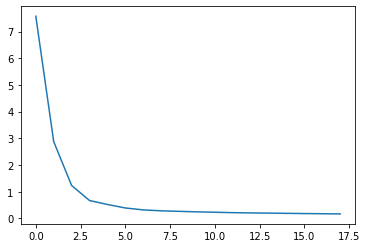

In [ ]:
plt.plot(mlpc2.loss_curve_)

In [ ]:

mlpc3 = MLPClassifier(activation='relu',
                      solver='sgd',
                      hidden_layer_sizes=(64, 49),
                      max_iter=1000,
                      random_state=1,
                      nesterovs_momentum= True,
                      learning_rate='constant',
                      early_stopping=True)
mlpc3.fit(X_train, y_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 49), max_iter=1000,
              random_state=1, solver='sgd')

In [ ]:
pred_mlpc3 = mlpc3.predict(X_test)
print(f1_score(y_test, pred_mlpc3, zero_division=1, average='weighted'))
# plt.plot(mlpc3.loss_curve_)

0.9629797440449941


In [ ]:
mlpc5 = MLPClassifier(activation='tanh',
                      solver='sgd',
                      hidden_layer_sizes=(34, 44),
                      max_iter=1000,
                      random_state=1,
                      nesterovs_momentum= True,
                      learning_rate='constant',
                      early_stopping=True)
mlpc5.fit(X_train, y_train)
pred_mlpc5 = mlpc5.predict(X_test)

In [ ]:
mlpc4 = MLPClassifier(activation='tanh',
                         solver='adam',
                         hidden_layer_sizes=(34, 44),
                         max_iter=1000,
                         random_state=1,
                         learning_rate='adaptive',
                         early_stopping=True)
mlpc4.fit(X_train, y_train)
pred_mlpc4 = mlpc4.predict(X_test)

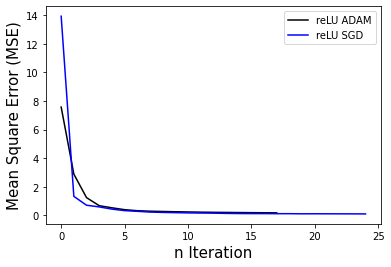

In [ ]:
loss1 = mlpc2.loss_curve_
loss2 = mlpc3.loss_curve_
loss3 = mlpc4.loss_curve_
loss4 = mlpc5.loss_curve_
plt.plot(range(0,len(loss1)), loss1, 'k', label='reLU ADAM')
plt.plot(range(0,len(loss2)), loss2, 'b', label='reLU SGD')
# plt.plot(range(0,len(loss3)), loss3, 'r', label='Sigmoid ADAM')
# plt.plot(range(0,len(loss4)), loss4, 'm', label='Sigmoid SGD')
plt.legend()
plt.ylabel('Mean Square Error (MSE)', fontsize=15)
plt.xlabel('n Iteration', fontsize=15)
plt.show()


In [ ]:
mlpc22 = MLPClassifier(activation='relu',
                         solver='adam',
                         hidden_layer_sizes=(39, 49),
                         max_iter=1000,
                         random_state=1,
                         learning_rate='adaptive',
                         early_stopping=True)
mlpc22.fit(X_train, y_train)
pred_mlpc3 = mlpc22.predict(X_test)
print(f1_score(y_test, pred_mlpc3, zero_division=1, average='weighted'))

0.9612797698575173


In [ ]:
from statistics import mean
ag = y_test.argsort()
xx, yy = X[ag], y[ag]
xx0, yy0 = X[0:500], y[0:500]
xx1, yy1 = X[500:1000], y[500:1000]
xx2, yy2 = X[1000:1500], y[1000:1500]
xx3, yy3 = X[1500:], y[1500:]

for j in range(7):
  arr = []
  for i in xx3:
    arr.append(round(np.average(i[j])))
  print(f"WS{j+1} = ", min(arr), max(arr), mean(arr))

# print(xx0)


WS1 =  -71 -52 -60.182
WS2 =  -66 -46 -55.224
WS3 =  -60 -40 -50.65
WS4 =  -77 -52 -61.316
WS5 =  -64 -36 -49.454
WS6 =  -96 -76 -87.008
WS7 =  -98 -78 -86.99


In [ ]:
arr = []
for i in xx3:
  arr.append(round(np.average(i)))

print(f"WS{j+1} = ", min(arr), max(arr), mean(arr))



WS7 =  -70 -60 -64.402


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9683333333333334

In [ ]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7533333333333333

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9833333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_test, y_test,cv=3)

array([0.975, 0.955, 0.96 ])

In [ ]:
cross_val_score(SVC(gamma='auto'), X_test, y_test,cv=3)

array([0.725, 0.52 , 0.49 ])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_test, y_test,cv=3)

array([0.975, 0.965, 0.97 ])

In [ ]:
cross_val_score(mlpc, X_test, y_test, cv=3)

array([0.88 , 0.875, 0.775])

In [ ]:
# arr = [[]]

# for i in mlpc2.coefs_[0]:
#   print("\n")
#   for j in i:
#     print()
#[coef.shape for coef in mlpc2.coefs_]
import csv


with open("new_file.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(mlpc2.coefs_[2])

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


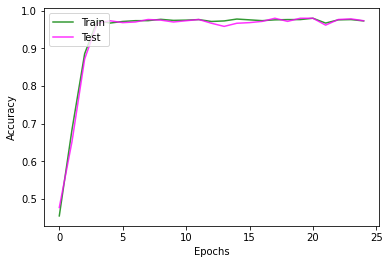

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
np.random.seed(1)


mlp = MLPClassifier(hidden_layer_sizes=(32, 40), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=0, tol=1e-8, random_state=1,
                    learning_rate_init=.01)

""" Home-made mini-batch learning
    -> not to be used in out-of-core setting!
"""
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(mlp.score(X_test, y_test))

    epoch += 1

""" Plot """
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
# plt.plot(mlpc2.validation_scores_, color='blue', alpha=0.8, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

max_iter = 1000
errors = []
for i in range(max_iter):
    mlp.partial_fit(X_train, y_train, classes=[0, 1, 2, 3])
    pred = mlp.predict(X_test)
    errors.append(mean_absolute_error(y_test, pred))



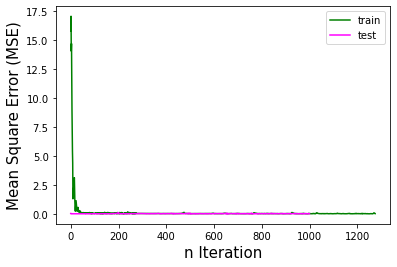

In [ ]:
loss1 = mlp.loss_curve_
loss2 =  errors
plt.plot(range(0,len(loss1)), loss1, 'green', label='train')
plt.plot(range(0,len(loss2)), loss2, 'magenta', label='test')

plt.legend()
plt.ylabel('Mean Square Error (MSE)', fontsize=15)
plt.xlabel('n Iteration', fontsize=15)
plt.show()

Text(0.5, 0, 'n Iteration')

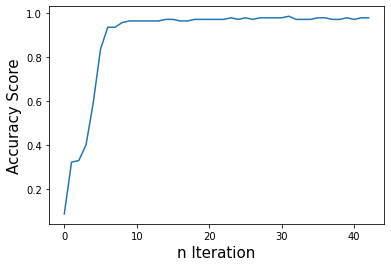

In [ ]:
plt.plot(mlpc2.validation_scores_)
plt.ylabel('Accuracy Score', fontsize=15)
plt.xlabel('n Iteration', fontsize=15)